In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
from sklearn.metrics import accuracy_score, recall_score, precision_score , confusion_matrix, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from IPython.display import display,Markdown,HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset

!pip install openpyxl
df = pd.read_excel('hr-employee-attrition.xlsx', engine='openpyxl', sheet_name='Data')
df


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data Cleaning and Manipulation

In [4]:
#Checking for missing/null values

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
#Checking for duplicates

df.duplicated().sum()

0

There are no null values and no duplicate values in the dataset

In [6]:
df['Attrition'] = df['Attrition'].map({"No":0, "Yes":1})

In [7]:
text_negative = "Negative"
text_positive = "Positive"
target_column = "Attrition"

df_all = df.copy()

df_positive = df[df[target_column]==1]

df_negative = df[df[target_column]==0]

In [8]:
def plot_pie(column, title="All Group/Class"):
    fig,axs = plt.subplots(1,1)
    data = df_all[column].value_counts()
    plt.pie(data,autopct='%1.2f%%',labels=data.index)
    plt.title(title)
    plt.show()
    
def plot_hist(column, title="All Group/Class"):
    plt.hist(df_all[column],density=True)
    plt.title(title)
    plt.show()

def plot_bar(column, sort=False, title="All Group/Class"):
    if sort:
        data_all = df_all[column].value_counts().sort_index()
    else:
        data_all = df_all[column].value_counts()
    plt.bar(data_all.index.astype(str),data_all)
    plt.title(title)
    plt.show()
    
def plot_bar_compare(column, sort=False):
    if sort:
        data_positive = df_positive[column].value_counts().sort_index()
        data_negative = df_negative[column].value_counts().sort_index()
    else:
        data_positive = df_positive[column].value_counts()
        data_negative = df_negative[column].value_counts()
    
    fig,axs = plt.subplots(2,1)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=2, wspace=0, hspace=0.2)
    axs[0].bar(data_negative.index.astype(str),data_negative)
    axs[0].title.set_text(text_negative)
    axs[1].bar(data_positive.index.astype(str),data_positive)
    axs[1].title.set_text(text_positive)
    plt.show()

def plot_hist_compare(column, bins=5):
    plt.hist([df_negative[column], df_positive[column]] , color=['c','r'])
    plt.legend((text_negative, text_positive))
    plt.show()
    
def plot_pie_compare(column):
    data_positive = df_positive[column].value_counts()
    data_negative = df_negative[column].value_counts()
    
    fig,axs = plt.subplots(2,1)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=2, wspace=0, hspace=0.2)
    axs[0].pie(data_negative,autopct='%1.2f%%',labels=data_negative.index)
    axs[0].title.set_text(text_negative)
    axs[1].pie(data_positive,autopct='%1.2f%%',labels=data_positive.index)
    axs[1].title.set_text(text_positive)
    plt.show()

def plot_boxplot(column, title=""):
    ax = sns.boxplot(x=target_column, y=column, palette=["c", "r"],
            hue=target_column,  data=df_all).set_title(title, fontsize=15)
    plt.show()

def check_median(column):
    data_negative = df_negative[column].describe()
    data_positive = df_positive[column].describe()
    print("Median:")
    print('{}: {}'.format(text_negative,data_negative['50%']))
    print('{}: {}'.format(text_positive,data_positive['50%']))

def check_most(column):
    data_negative = df_negative[column].value_counts()
    data_positive = df_positive[column].value_counts()
    print("Most:")
    print('{}: {}'.format(text_negative,data_negative.index[0]))
    print('{}: {}'.format(text_positive,data_positive.index[0]))


In [9]:
def eda(df_all):
    display(HTML('<h1>Exploratory Data Analysis<h1>'))
    
    for column in df_all.columns:
        if column == target_column:
            continue
        display(HTML('<h2>{}<h2>'.format(column)))
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            if len(df[column].unique())>10 :
                plot_boxplot(column)
                check_median(column)
            else:
                plot_bar(column)
                plot_pie(column)
                plot_pie_compare(column)
                check_most(column)
        elif df[column].dtype == 'object':
            if len(df[column].unique())>10 :
                df[column].value_counts().head(5)
                df_negative[column].value_counts().head(5)
                df_positive[column].value_counts().head(5)
            else:
                plot_bar(column)
                plot_pie(column)
                plot_pie_compare(column)
                check_most(column)
        else:
            None

### Attrition

In [10]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

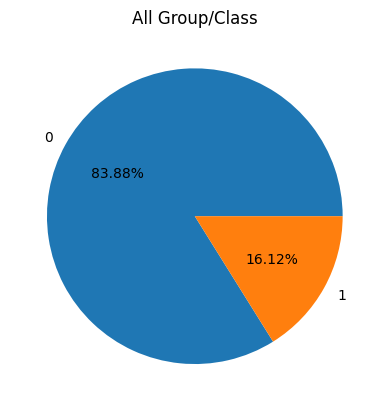

In [11]:
plot_pie('Attrition')

The dataset is not balanced

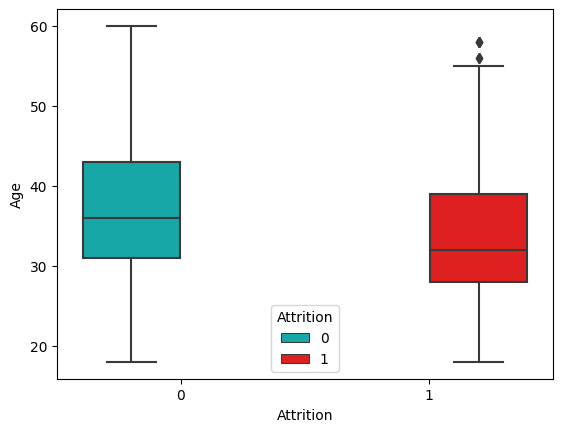

Median:
Negative: 36.0
Positive: 32.0


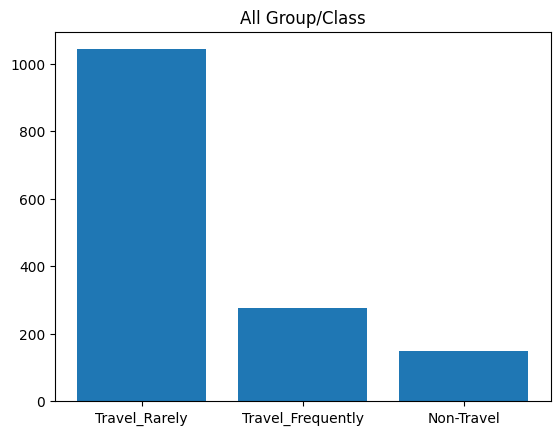

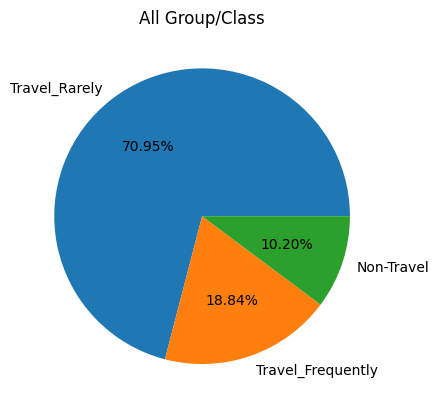

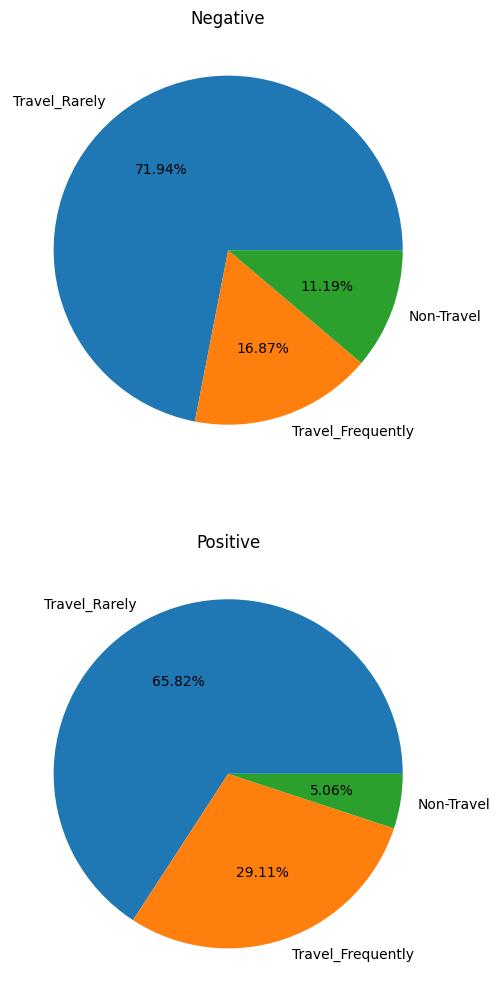

Most:
Negative: Travel_Rarely
Positive: Travel_Rarely


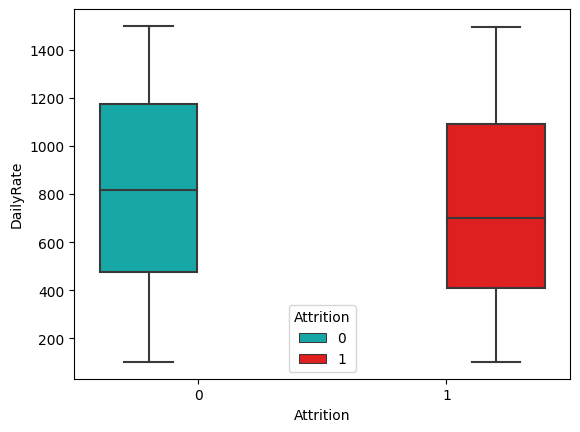

Median:
Negative: 817.0
Positive: 699.0


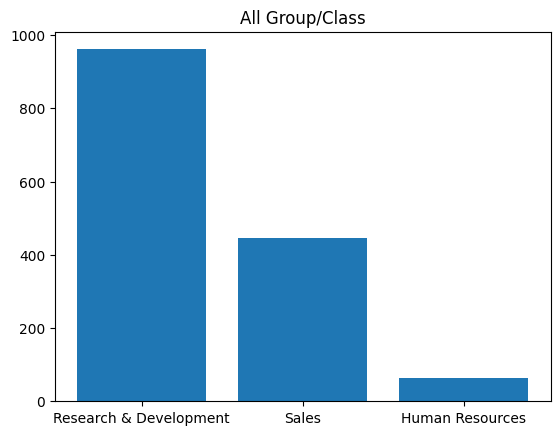

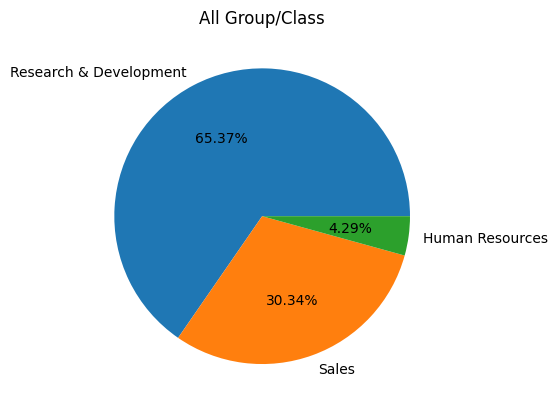

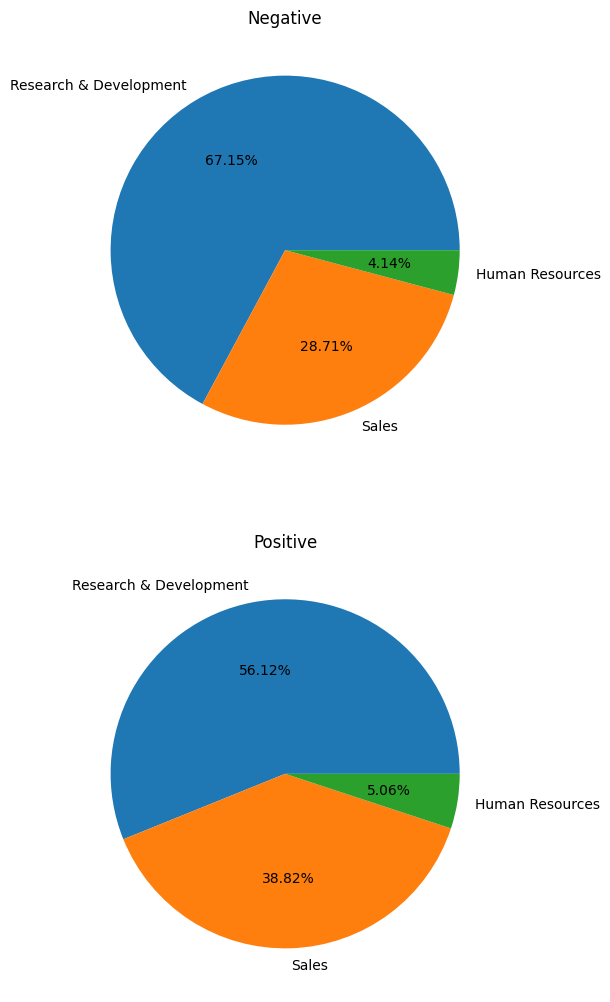

Most:
Negative: Research & Development
Positive: Research & Development


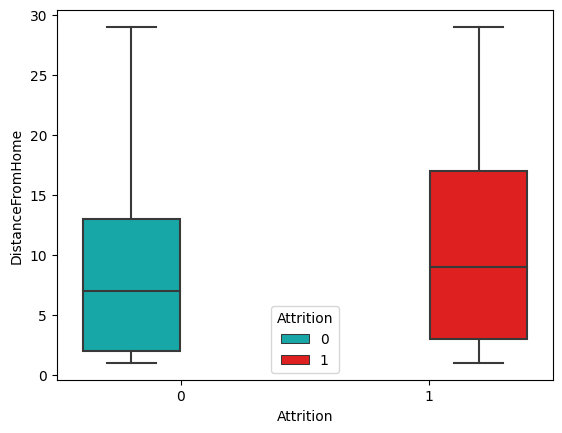

Median:
Negative: 7.0
Positive: 9.0


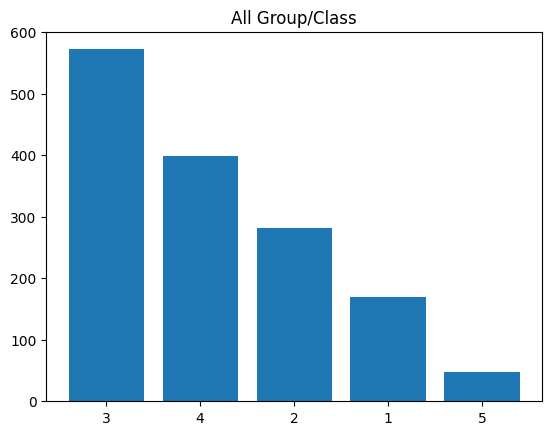

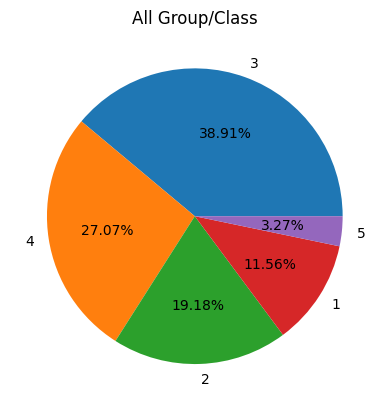

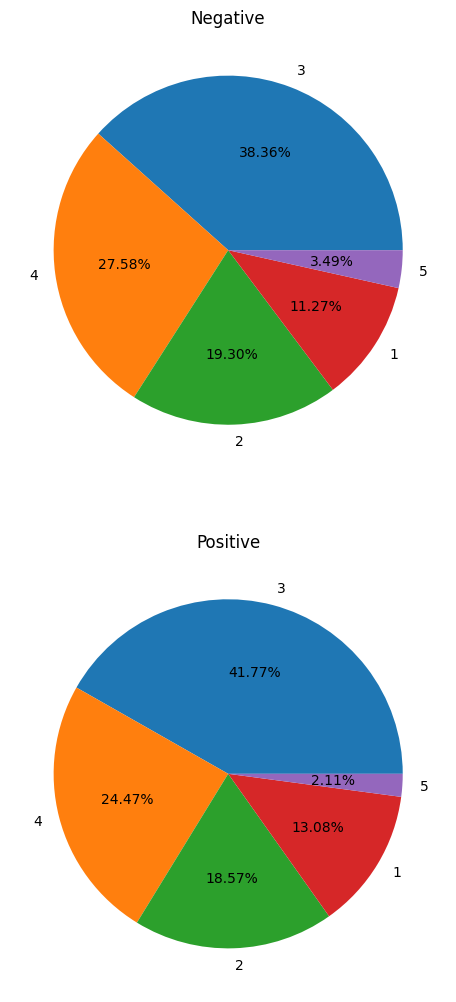

Most:
Negative: 3
Positive: 3


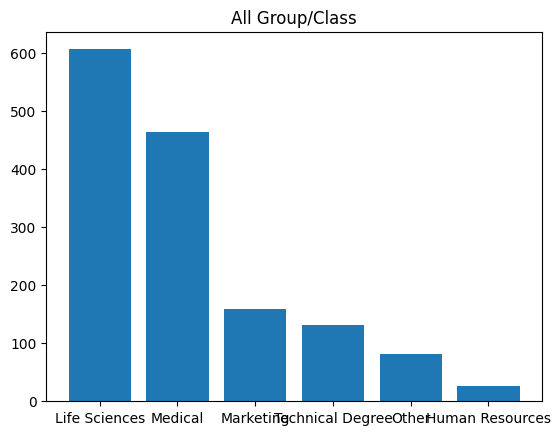

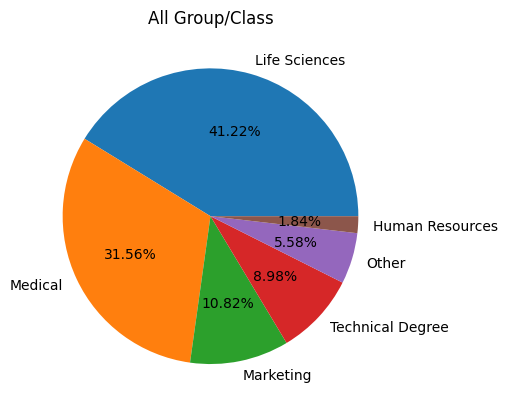

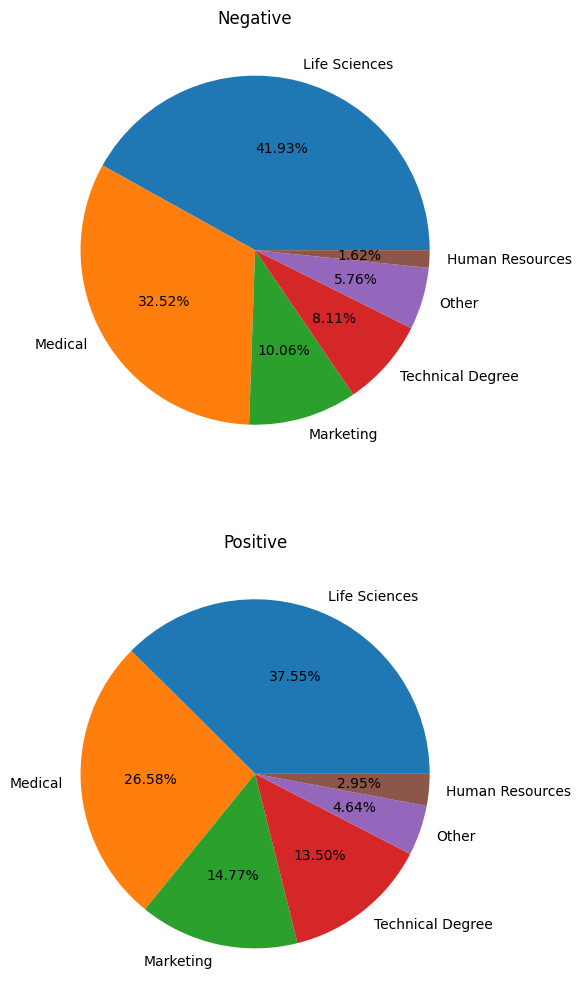

Most:
Negative: Life Sciences
Positive: Life Sciences


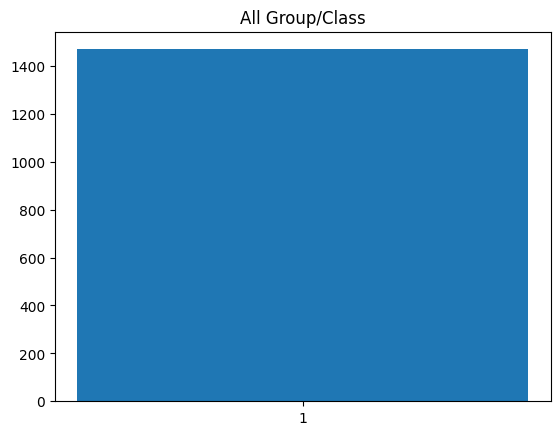

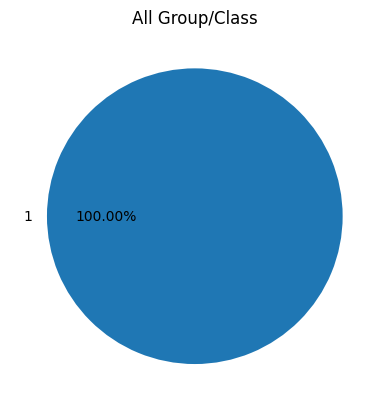

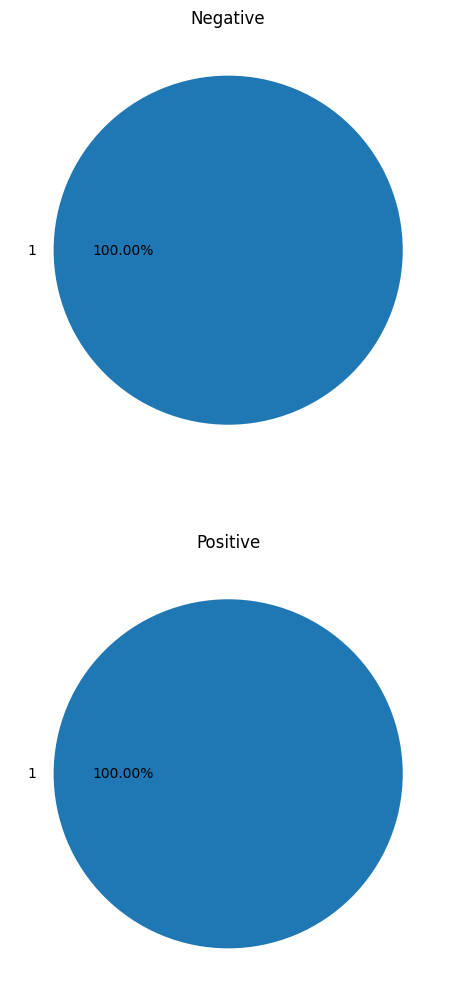

Most:
Negative: 1
Positive: 1


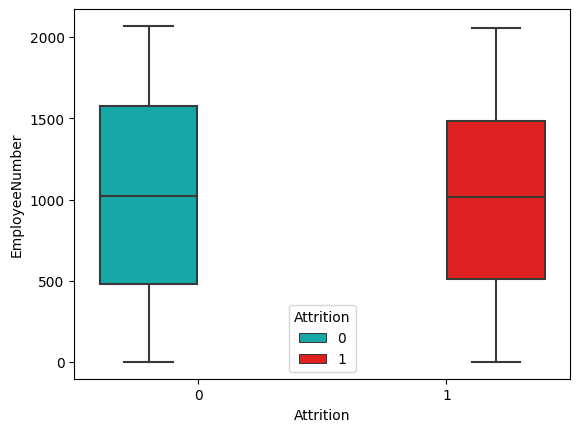

Median:
Negative: 1022.0
Positive: 1017.0


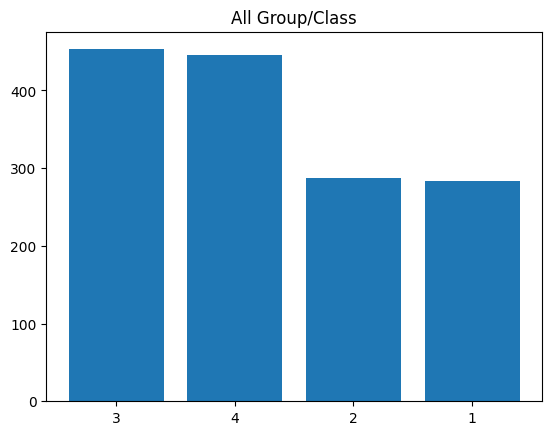

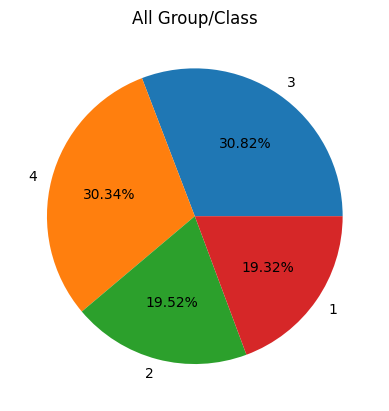

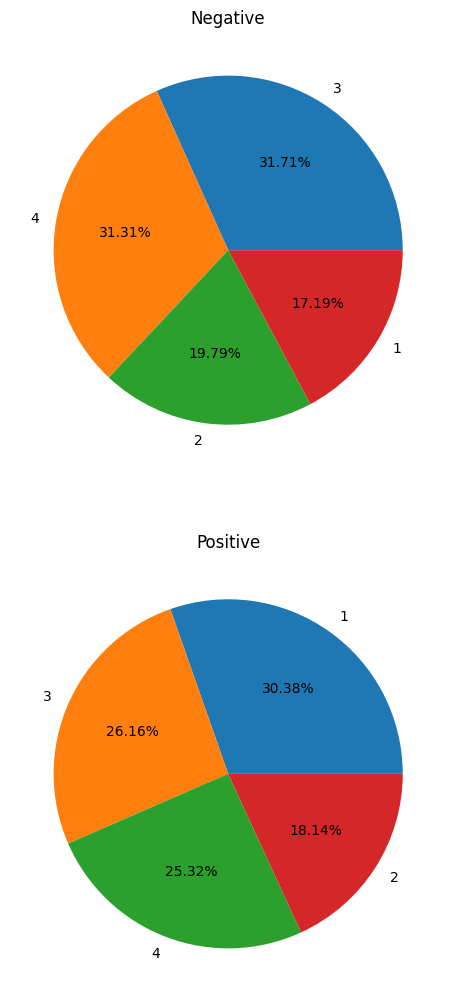

Most:
Negative: 3
Positive: 1


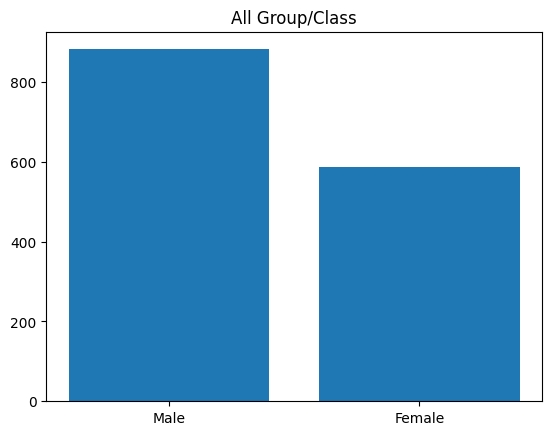

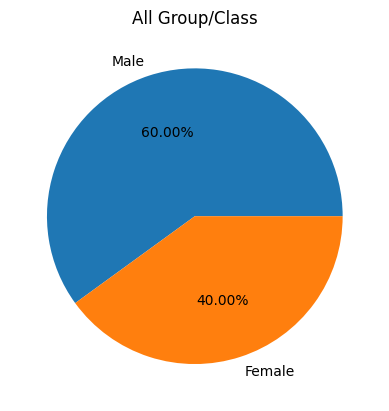

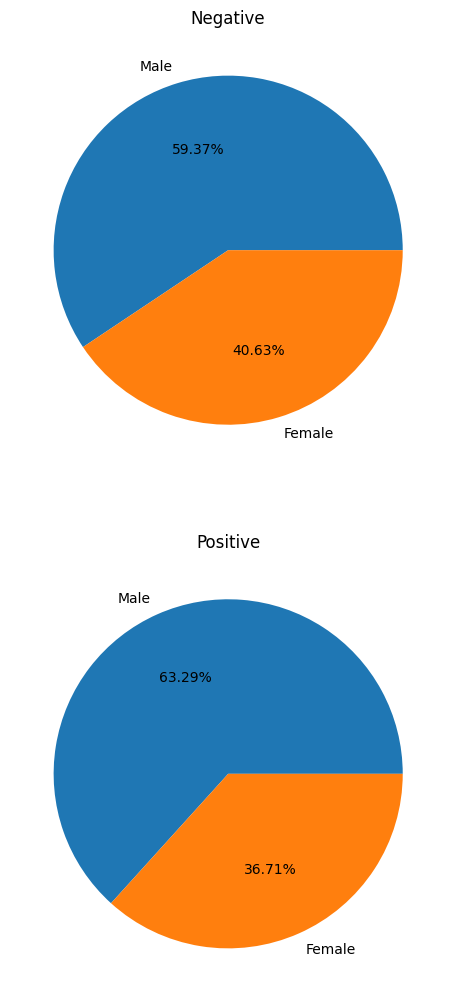

Most:
Negative: Male
Positive: Male


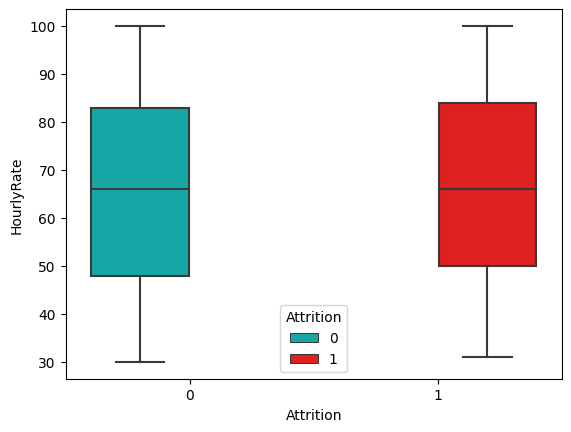

Median:
Negative: 66.0
Positive: 66.0


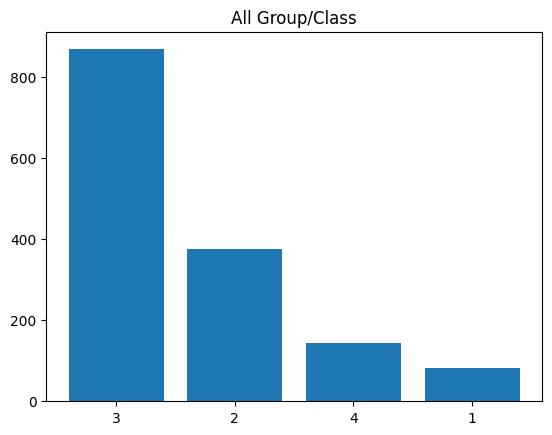

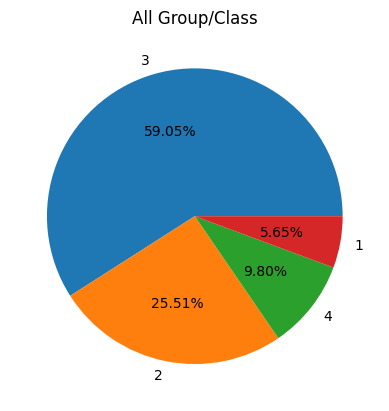

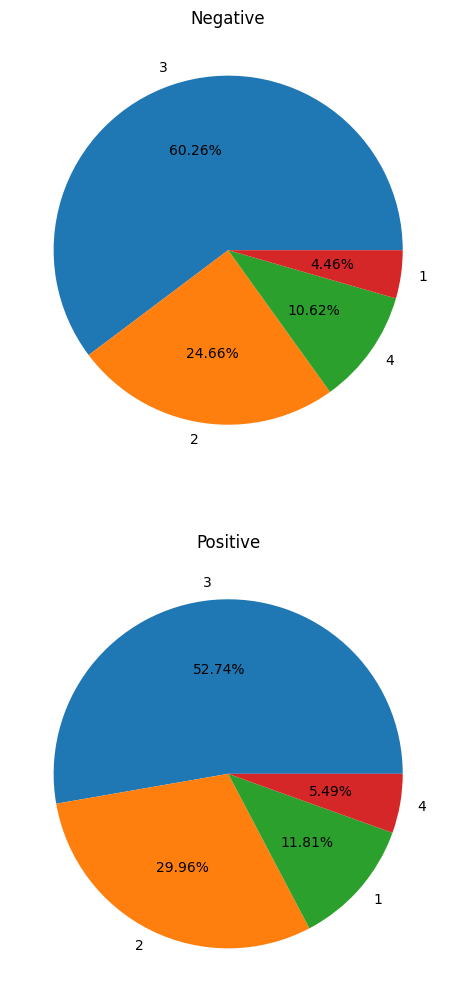

Most:
Negative: 3
Positive: 3


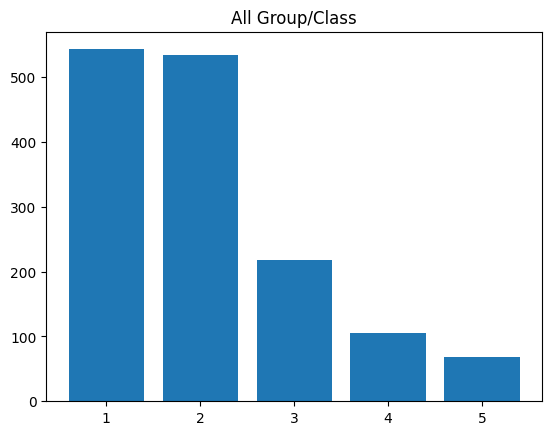

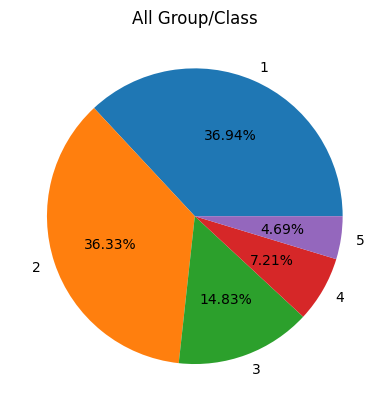

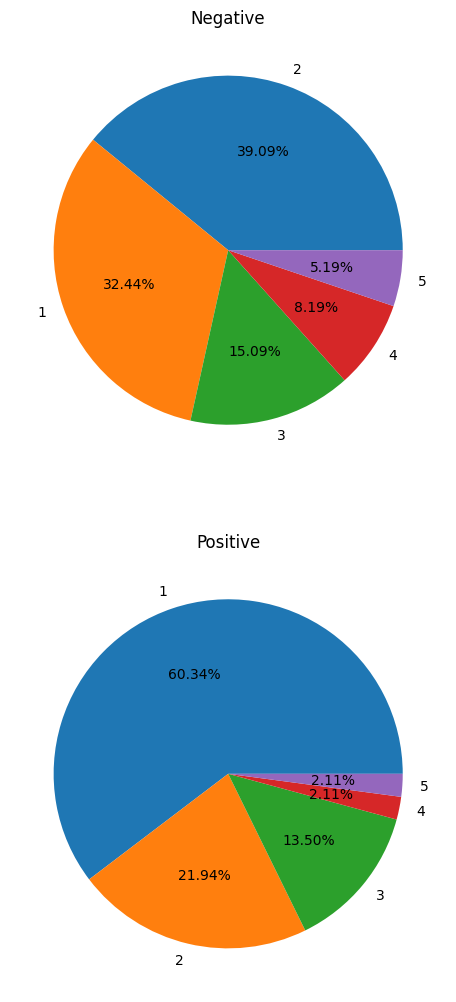

Most:
Negative: 2
Positive: 1


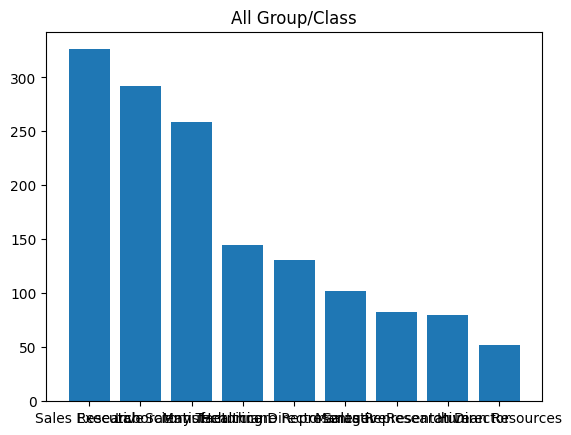

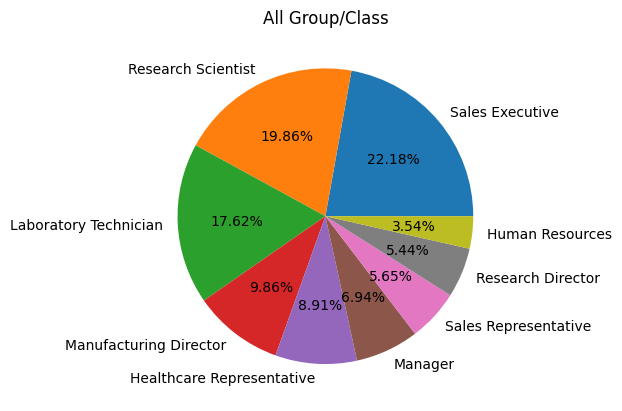

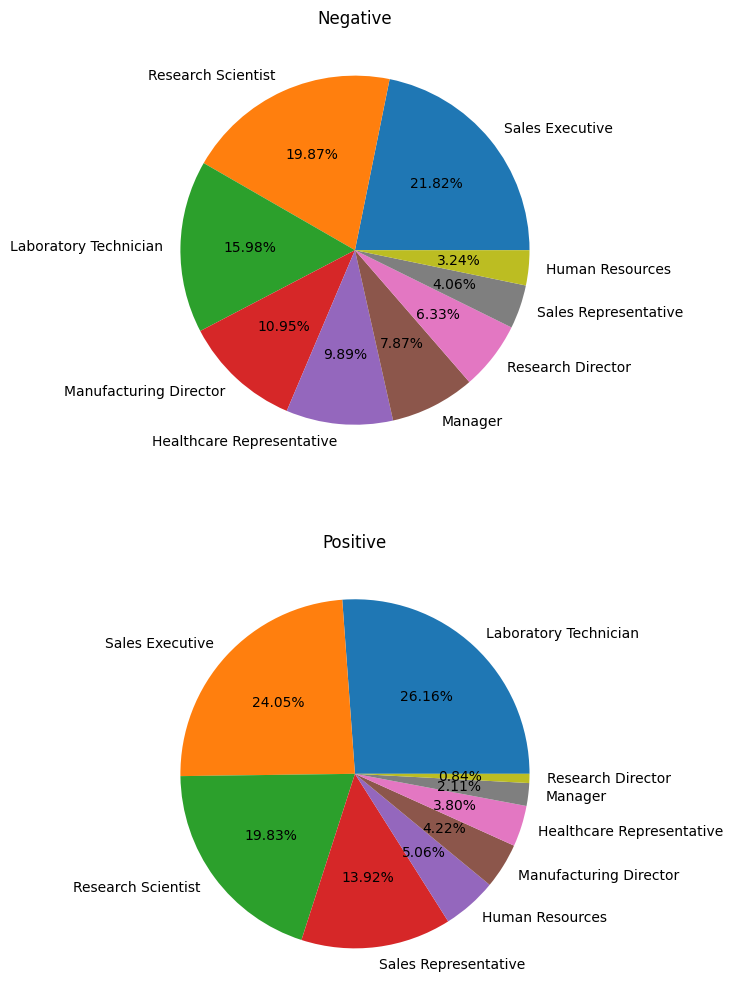

Most:
Negative: Sales Executive
Positive: Laboratory Technician


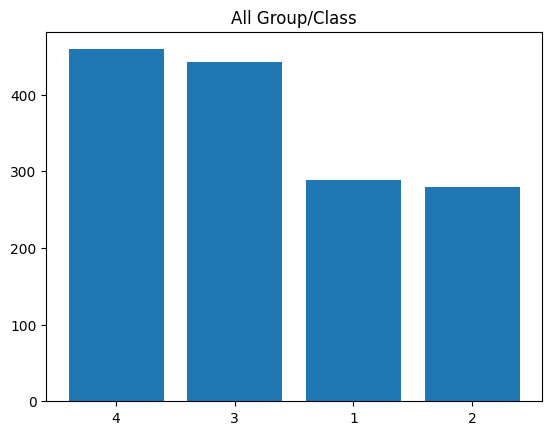

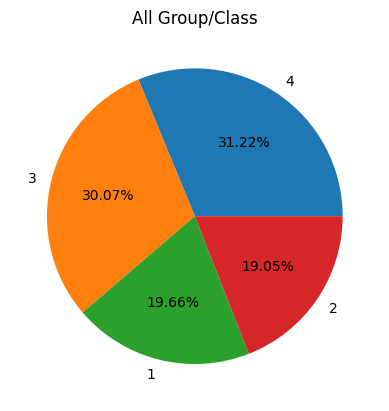

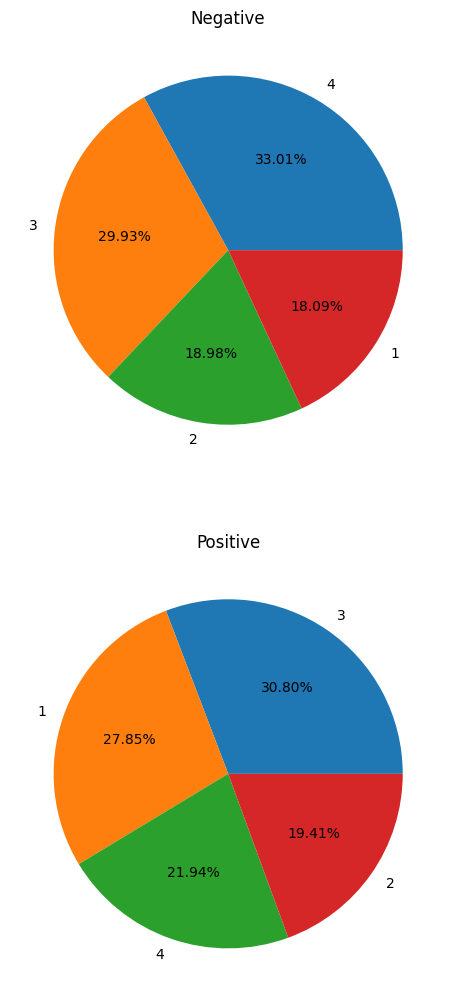

Most:
Negative: 4
Positive: 3


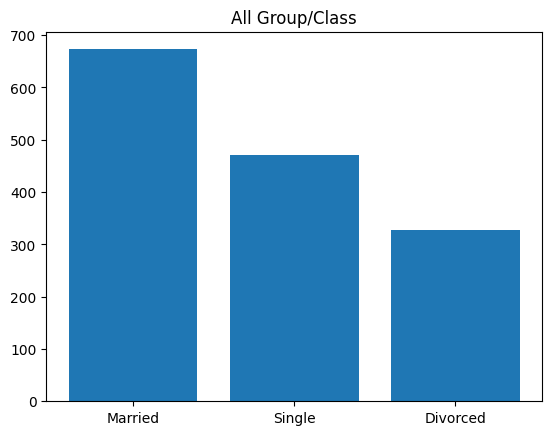

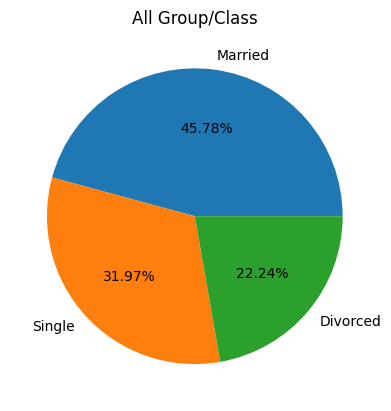

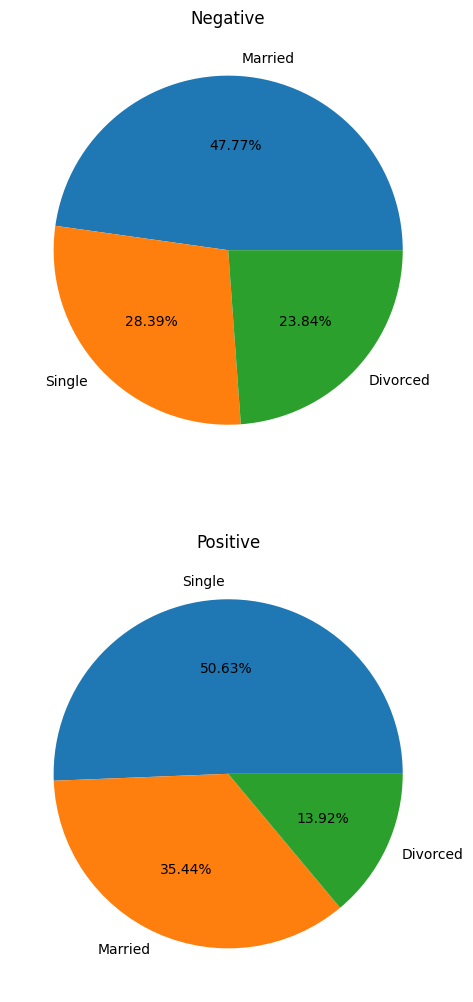

Most:
Negative: Married
Positive: Single


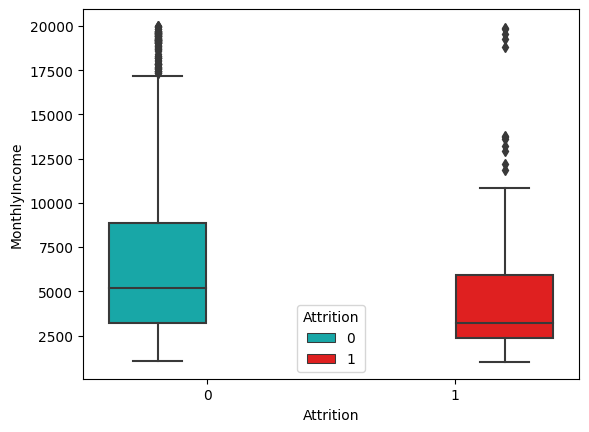

Median:
Negative: 5204.0
Positive: 3202.0


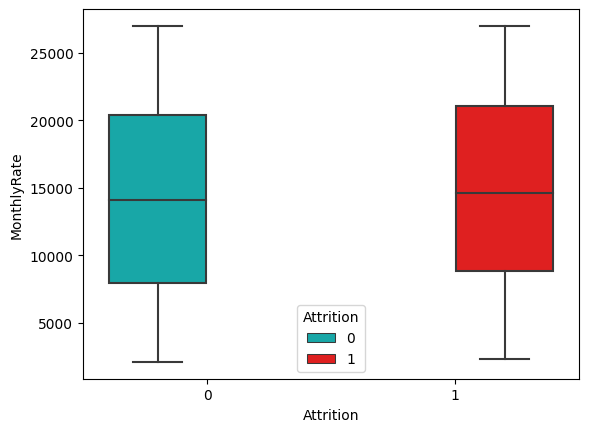

Median:
Negative: 14120.0
Positive: 14618.0


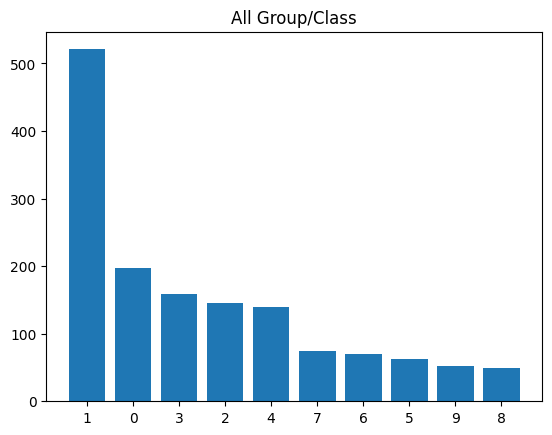

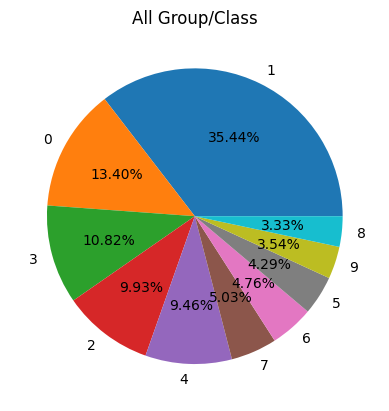

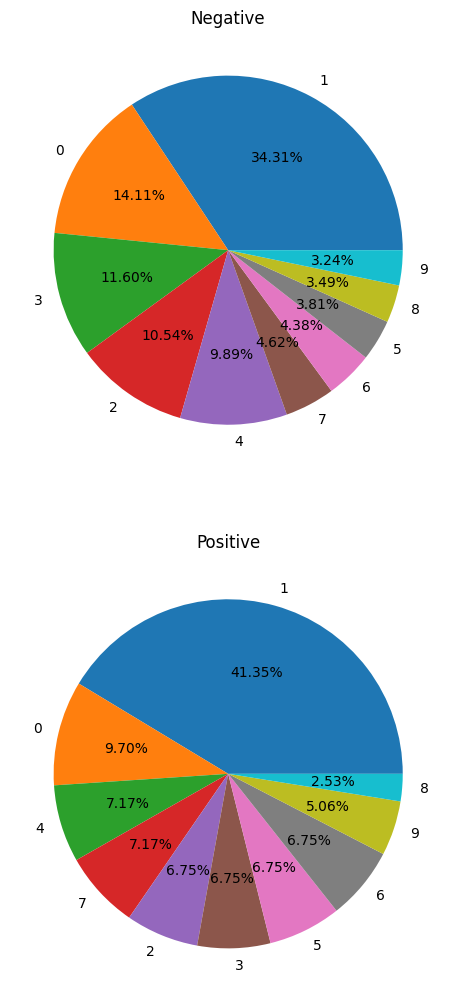

Most:
Negative: 1
Positive: 1


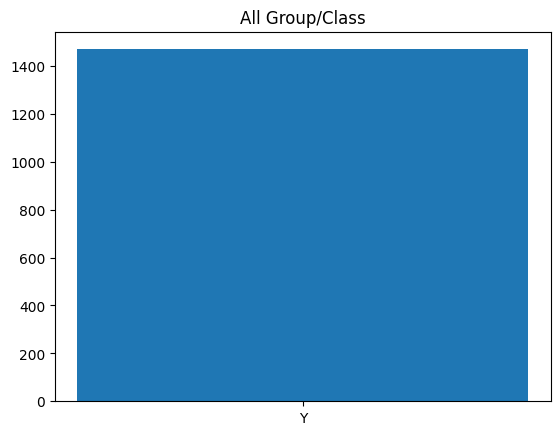

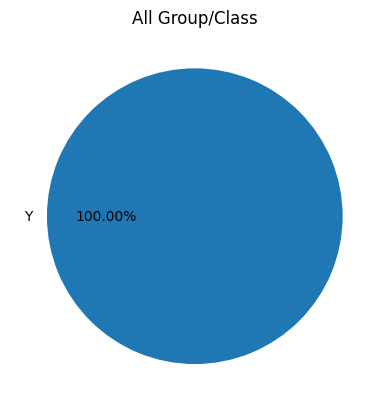

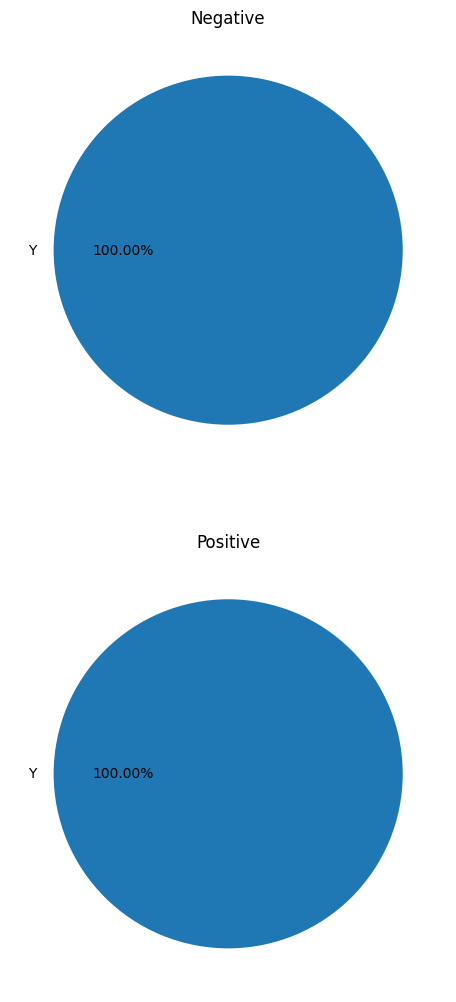

Most:
Negative: Y
Positive: Y


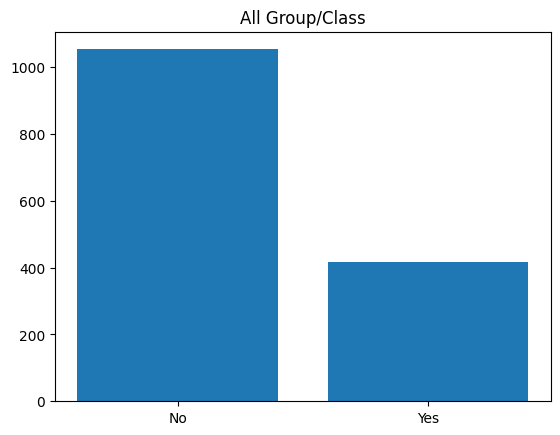

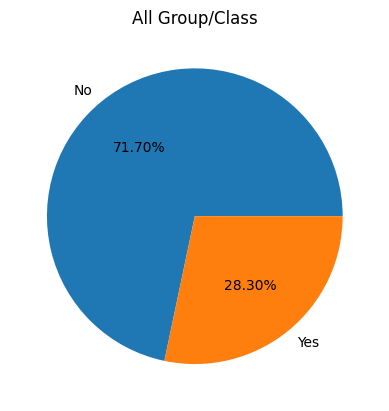

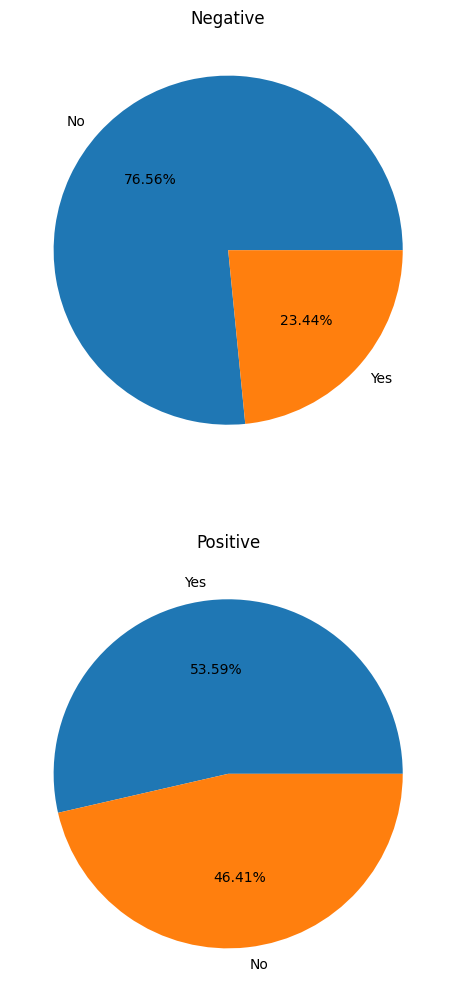

Most:
Negative: No
Positive: Yes


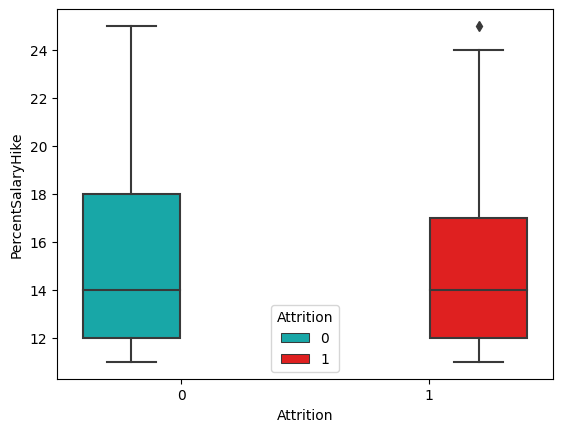

Median:
Negative: 14.0
Positive: 14.0


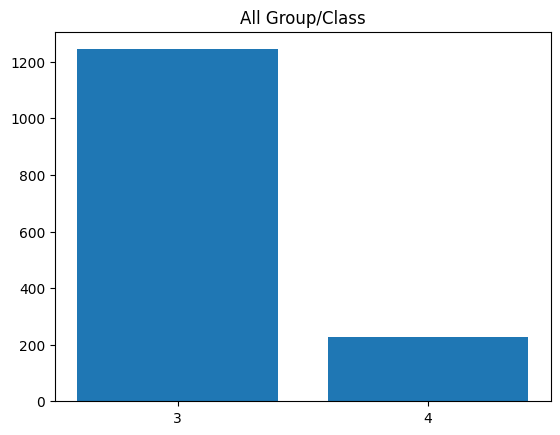

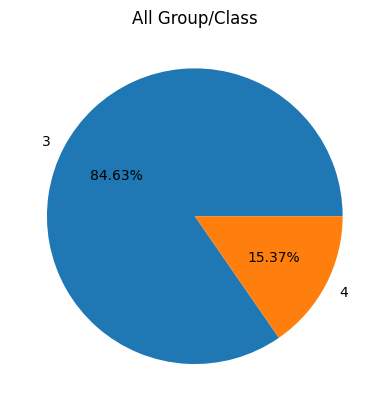

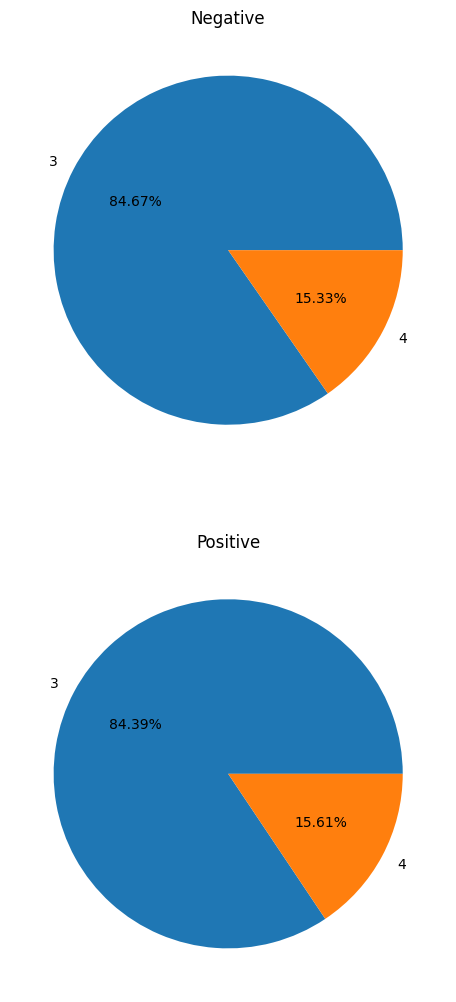

Most:
Negative: 3
Positive: 3


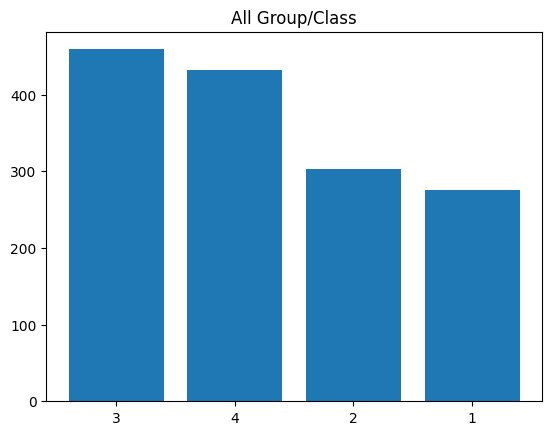

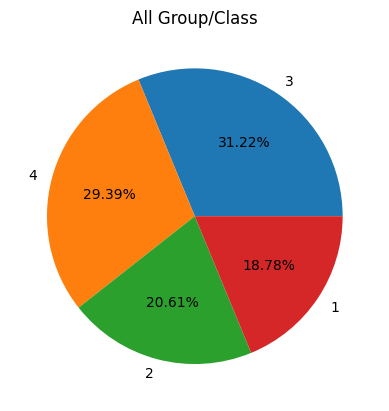

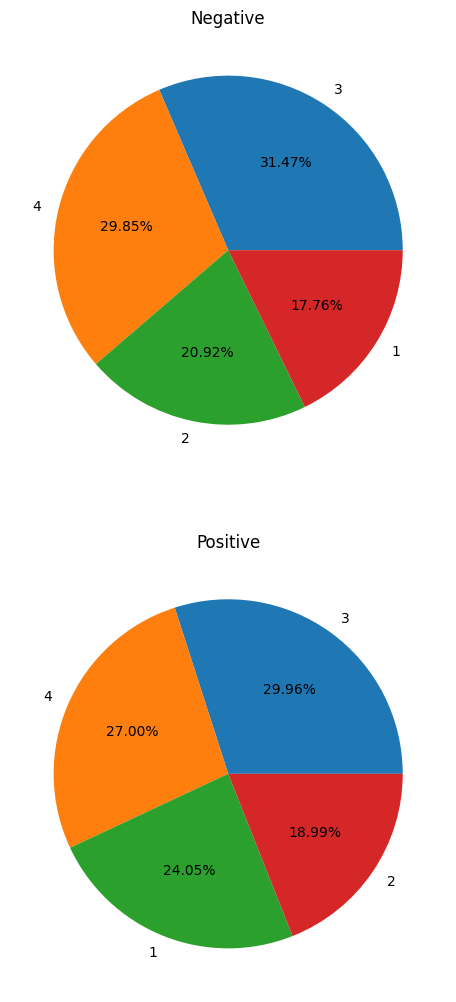

Most:
Negative: 3
Positive: 3


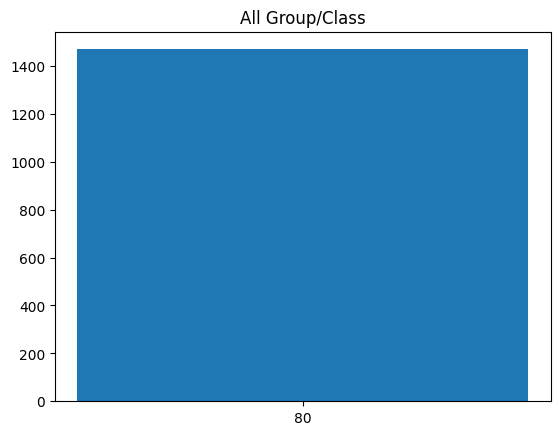

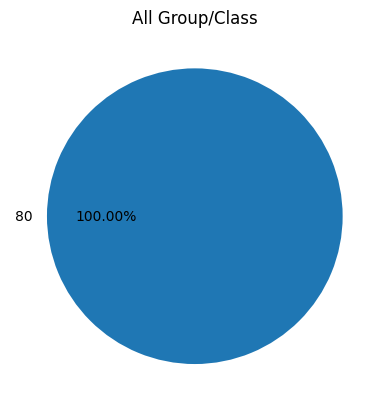

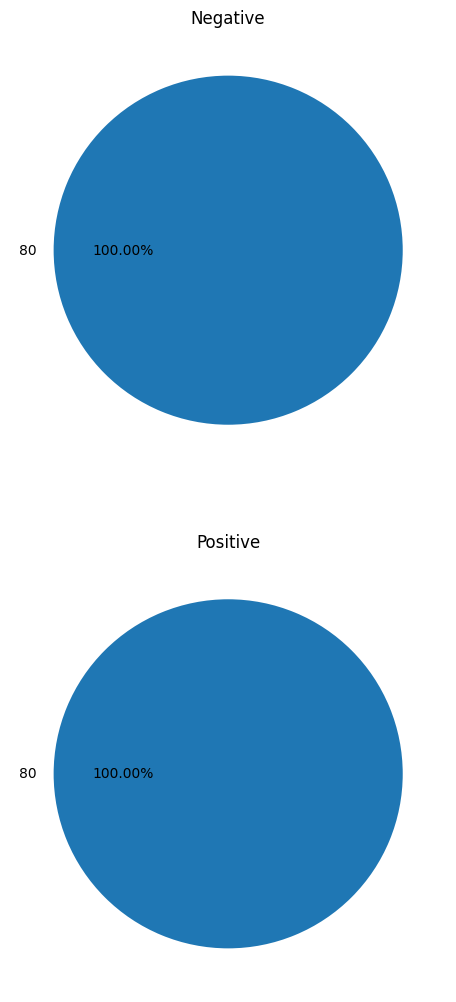

Most:
Negative: 80
Positive: 80


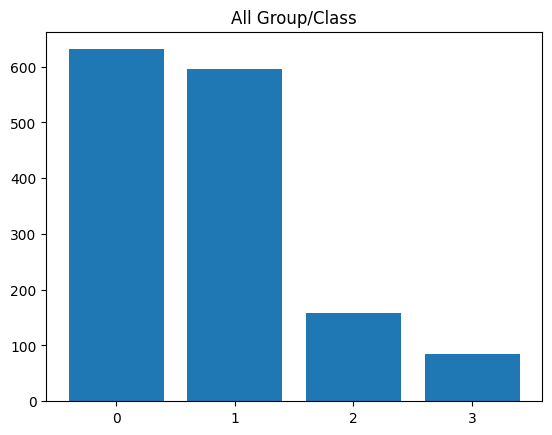

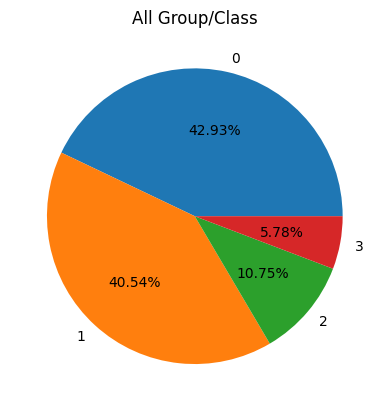

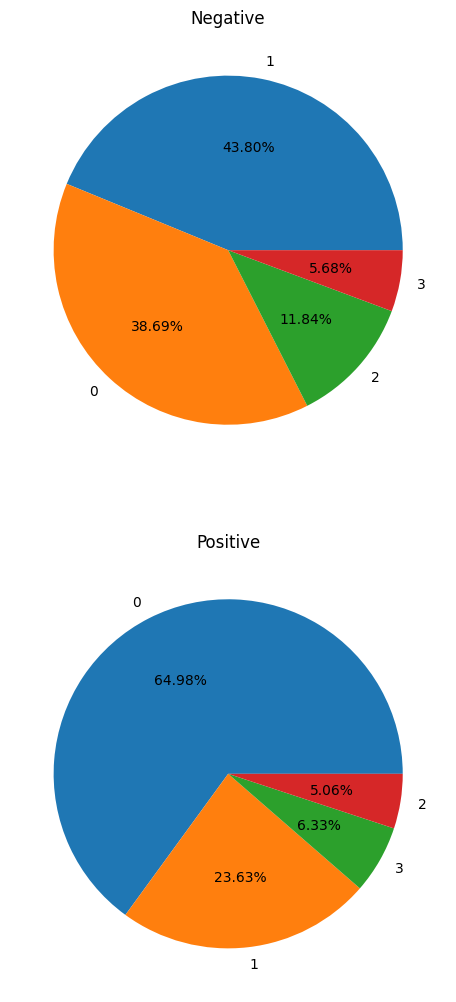

Most:
Negative: 1
Positive: 0


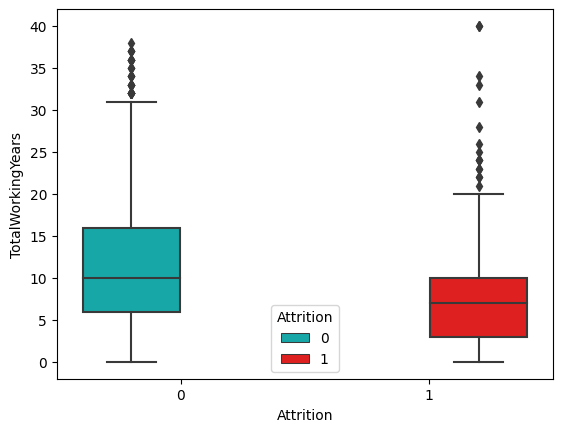

Median:
Negative: 10.0
Positive: 7.0


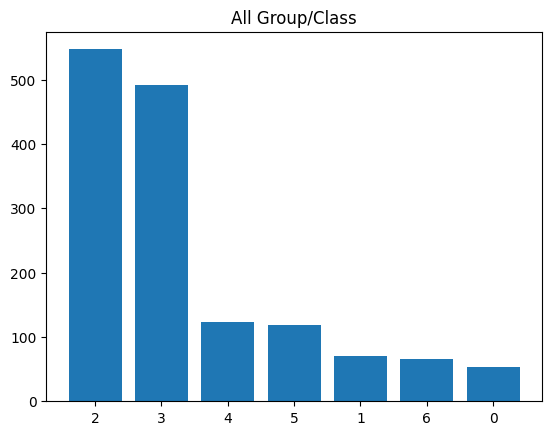

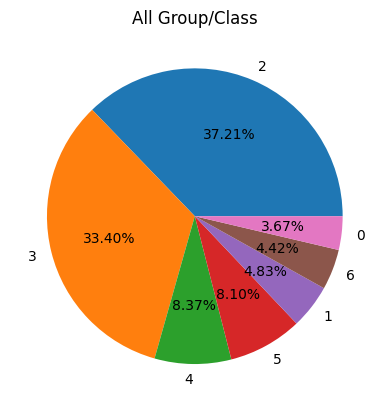

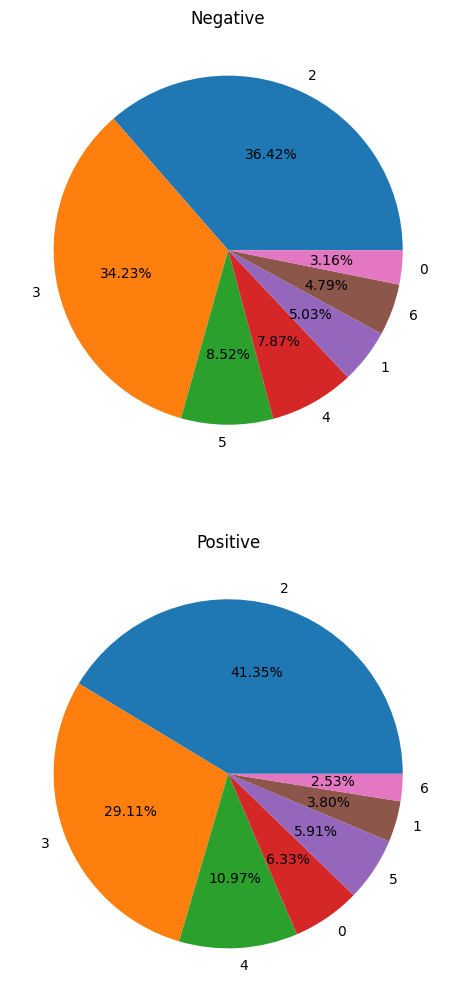

Most:
Negative: 2
Positive: 2


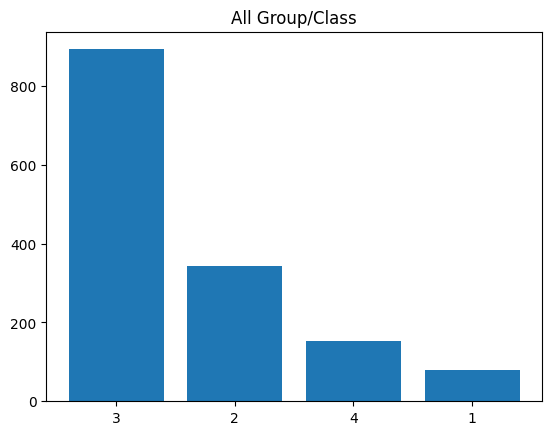

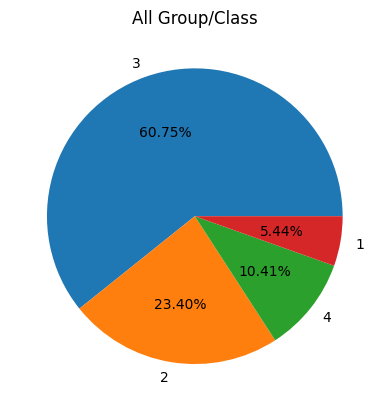

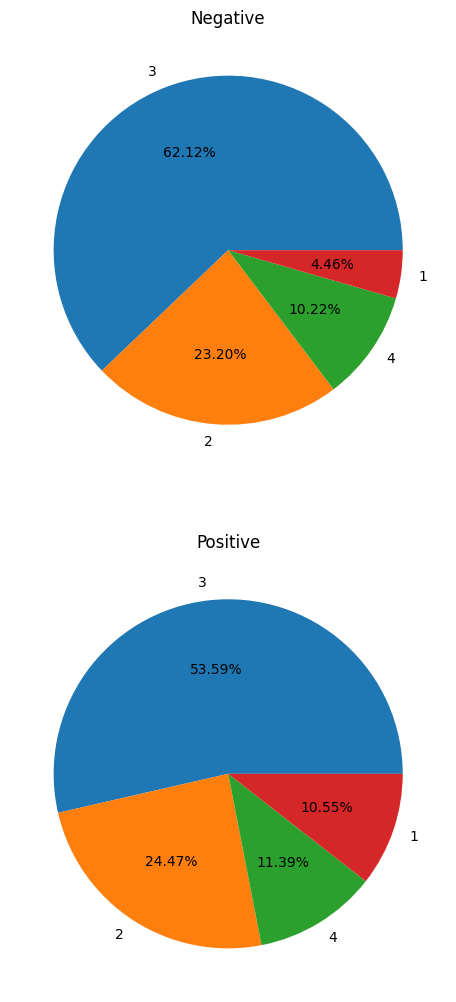

Most:
Negative: 3
Positive: 3


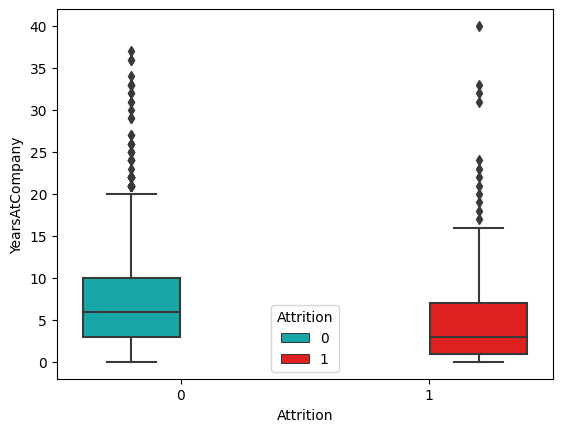

Median:
Negative: 6.0
Positive: 3.0


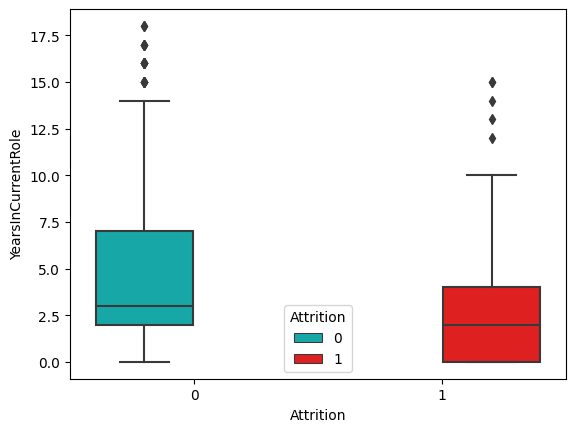

Median:
Negative: 3.0
Positive: 2.0


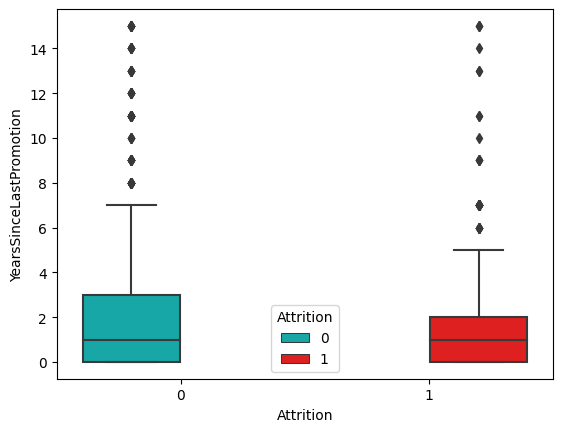

Median:
Negative: 1.0
Positive: 1.0


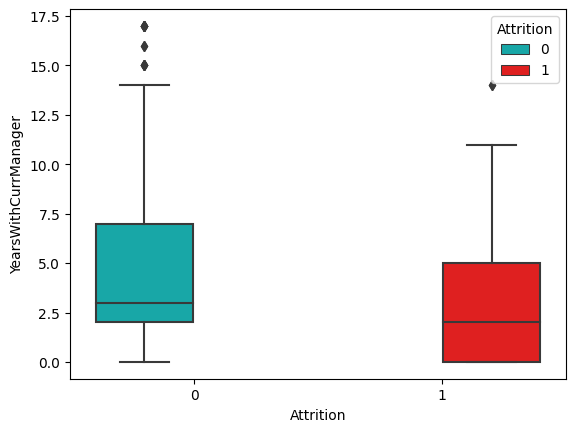

Median:
Negative: 3.0
Positive: 2.0


In [12]:
eda(df_all)

# Data Processing

In [13]:
X = df.copy()

y = X[target_column]

X = X.drop([target_column,'Over18',"EmployeeCount","EmployeeNumber","HourlyRate","MonthlyRate","PercentSalaryHike","StandardHours","YearsSinceLastPromotion"], axis=1)

In [14]:
X = pd.get_dummies(X, columns=["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"],drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [16]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: you may need to restart the kernel to use updated packages.


In [17]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#sm = SMOTE(random_state=1234)
ros = RandomOverSampler(sampling_strategy='minority',random_state=1234)
#rus = RandomUnderSampler(sampling_strategy='majority', random_state=1234)

#X_balance, y_balance  = sm.fit_resample(X_train, y_train)
X_balance, y_balance = ros.fit_resample(X_train, y_train)
#X_balance, y_balance = rus.fit_resample(X_train, y_train)

print(f'''Shape of X before Balancing: {X.shape}
Shape of X after Balancing: {X_balance.shape}''')

print('\nBalance of positive and negative classes (%):')
y_balance.value_counts(normalize=True) * 100

Shape of X before Balancing: (1470, 40)
Shape of X after Balancing: (1972, 40)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Attrition, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_balance = sc.fit_transform(X_balance)
X_test = sc.transform(X_test)

In [19]:
!pip install xgboost
!pip install catboost
!pip install lightgbm

In [20]:
# Import ML Libraries
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [[CatBoostClassifier(verbose=0),'CatBoost Classifier'],[XGBClassifier(eval_metric='error'),'XGB Classifier'], [RandomForestClassifier(),'Random Forest'], 
    [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(),'SGD Classifier'], [SVC(),'SVC'],[LGBMClassifier(),'LGBM Classifier'],
              [GaussianNB(),'GaussianNB'],[DecisionTreeClassifier(),'Decision Tree Classifier'],[LogisticRegression(),'Logistic Regression'],[AdaBoostClassifier(),"AdaBoostClassifier"]]

In [21]:
for cls in classifiers:
    model = cls[0]
    model.fit(X_balance, y_balance)
    
    y_pred = model.predict(X_test)
    print(cls[1])
    print ('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
    print("Recall : ", recall_score(y_test, y_pred) *  100)
    print("Precision : ", precision_score(y_test, y_pred) *  100)
    print("F1 : ", f1_score(y_test, y_pred) *  100)
    print("ROC AUC : ", roc_auc_score(y_test, y_pred) *  100)
    print("\n")

CatBoost Classifier
Confusion Matrix:
[[237  10]
 [ 26  21]]
Accuracy :  87.75510204081633
Recall :  44.680851063829785
Precision :  67.74193548387096
F1 :  53.84615384615385
ROC AUC :  70.31613403393918


XGB Classifier
Confusion Matrix:
[[236  11]
 [ 26  21]]
Accuracy :  87.41496598639455
Recall :  44.680851063829785
Precision :  65.625
F1 :  53.16455696202532
ROC AUC :  70.1137048841416


Random Forest
Confusion Matrix:
[[245   2]
 [ 32  15]]
Accuracy :  88.43537414965986
Recall :  31.914893617021278
Precision :  88.23529411764706
F1 :  46.875
ROC AUC :  65.5525885089155


K-Nearest Neighbours
Confusion Matrix:
[[191  56]
 [ 20  27]]
Accuracy :  74.14965986394559
Recall :  57.446808510638306
Precision :  32.53012048192771
F1 :  41.53846153846153
ROC AUC :  67.38737186665517


SGD Classifier
Confusion Matrix:
[[174  73]
 [ 19  28]]
Accuracy :  68.70748299319727
Recall :  59.57446808510638
Precision :  27.722772277227726
F1 :  37.83783783783784
ROC AUC :  65.00990610733052


SVC
Confu

# Artificial Neural Network

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from numpy.random import seed

seed(1234)
tf.random.set_seed(1234)

2023-11-24 13:15:47.192800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-24 13:15:47.311686: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-24 13:15:47.311725: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-24 13:15:47.330325: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-24 13:15:49.573479: W tensorflow/stream_executor/platform/de

In [23]:
#train the model
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(32, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

2023-11-24 13:15:53.151171: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-24 13:15:53.151204: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-24 13:15:53.151220: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-6c46d15b-2567-4cd1-b744-89b3536d7181): /proc/driver/nvidia/version does not exist
2023-11-24 13:15:53.151463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
opt = Adam(learning_rate=0.001)
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience=15, verbose=1,restore_best_weights=True)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_balance, y_balance, batch_size=32, epochs=200,validation_split = 0.15, callbacks = [earlystopper],verbose = 1)
history_dict = history.history

Epoch 1/200
53/53 [==============================] - 1s 6ms/step - loss: 0.6891 - accuracy: 0.5698 - val_loss: 0.7509 - val_accuracy: 0.0236
Epoch 2/200
53/53 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.6044 - val_loss: 0.7599 - val_accuracy: 0.1689
Epoch 3/200
53/53 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.6313 - val_loss: 0.7410 - val_accuracy: 0.4696
Epoch 4/200
53/53 [==============================] - 0s 3ms/step - loss: 0.6284 - accuracy: 0.6629 - val_loss: 0.7048 - val_accuracy: 0.5709
Epoch 5/200
53/53 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.6802 - val_loss: 0.6532 - val_accuracy: 0.6250
Epoch 6/200
53/53 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7142 - val_loss: 0.5691 - val_accuracy: 0.6824
Epoch 7/200
53/53 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7428 - val_loss: 0.5657 - val_accuracy: 0.6824
Epoch 8/200
5

Text(0.5, 0, 'Epochs')

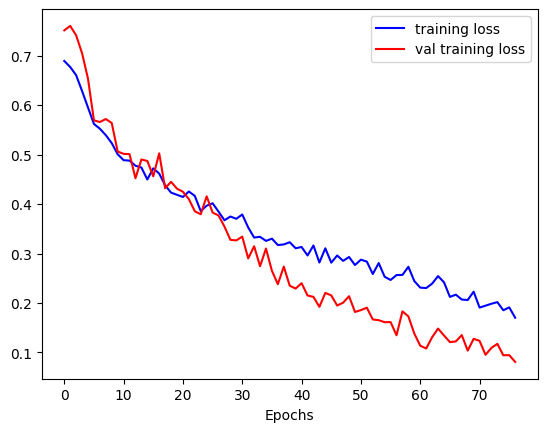

In [25]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

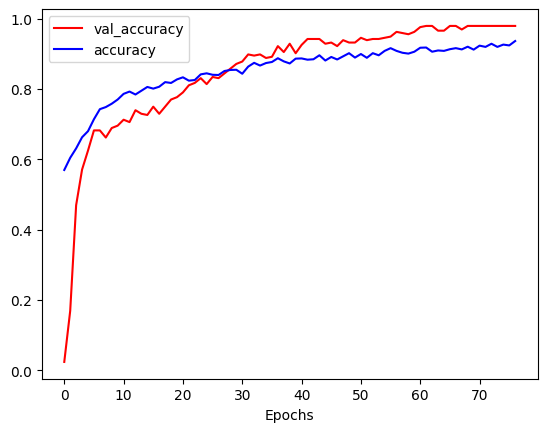

In [26]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred = [1 if x == True else 0 for x in y_pred]

10/10 [==============================] - 0s 784us/step


In [28]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Recall : ", recall_score(y_test, y_pred) *  100)
print("Precision : ", precision_score(y_test, y_pred) *  100)
print("F1 : ", f1_score(y_test, y_pred) *  100)
print("ROC AUC : ", roc_auc_score(y_test, y_pred) *  100)

[[216  31]
 [ 23  24]]
Accuracy :  81.63265306122449
Recall :  51.06382978723404
Precision :  43.63636363636363
F1 :  47.05882352941176
ROC AUC :  69.25661124989232


The best algorithm is XGB Classifier

Accuracy : 88.09523809523809
Recall : 44.680851063829785
Precision : 70.0
F1 : 54.54545454545453
ROC AUC : 70.51856318373675

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6c46d15b-2567-4cd1-b744-89b3536d7181' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>